The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


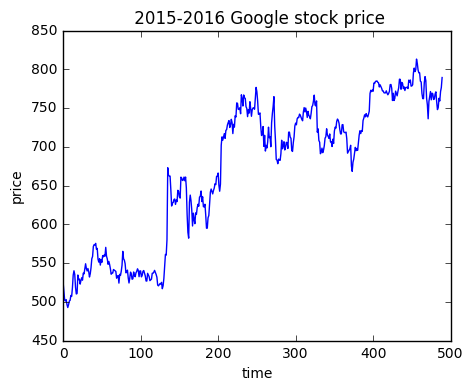

In [8]:
import numpy as np

import sys
if "../" not in sys.path:
  sys.path.append("../")
from src.solver import Solver
from src.model import AR, MA
from src.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

import src.data_processor as dp
import src.inference 
from src.ts_gen import ar1_gen


import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


X = np.matrix(np.genfromtxt('./data/GOOG.csv',delimiter=','))
nrow=X.shape[0]


plt.plot(X.T)
plt.xlabel('time')
plt.ylabel('price')
plt.title(' 2015-2016 Google stock price')
plt.show()



In [15]:

lag=1
phi=np.random.randn(lag, 1)
sigma=2.0
intercept=0.1
MA_model=MA(lag=lag,phi=phi,sigma=sigma,intercept=intercept)
AR_model=AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)

"""AR_solver = Solver(AR_model, X,
                          update_rule='sgd',
                          optim_config={
                            'learning_rate': 1e-5,
                          },
                          
                          num_epochs=3000, batch_size=1,print_every=100)
AR_solver.train()"""

MA_solver = Solver(MA_model, X,
                          update_rule='sgd',
                          optim_config={
                            'learning_rate': 1e-5,
                          },
                          
                          num_epochs=1, batch_size=1,print_every=1)
MA_solver.train()
MA_model.params


1
the loss is 10519992.108760


{'intercept': 0.10000000000000001,
 'phi': array([[-257.18855947]]),
 'sigma': 212.37235057633373}